In lecture, we explored the concept of a random walk, using a set of different models of drunks. Below is the code we used for locations and fields and the base class of drunks – you should not have to study this code in detail, since you have seen it in lecture.

## CODE FROM LECTURE:

In [5]:
import pylab
%matplotlib inline

class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
        
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

import random

class Drunk(object):
    def __init__(self, name):
        self.name = name
    def __str__(self):
        return 'This drunk is named ' + self.name

## NEW CODE

The following function is new, and returns the actual x and y distance from the start point to the end point of a random walk.

In [6]:
def walkVector(f, d, numSteps):
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return(f.getLoc(d).getX() - start.getX(), f.getLoc(d).getY() - start.getY())

## DRUNK VARIATIONS

Here are several different variations on a drunk.

In [27]:
import math
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,0.9), (0.0,-1.03), (1.03, 0.0), (-1.03, 0.0)]
        return random.choice(stepChoices)

class EDrunk(Drunk):
    def takeStep(self):
        ang = 2 * math.pi * random.random()
        length = 0.5 + 0.5 * random.random()
        return (length * math.sin(ang), length * math.cos(ang))

class PhotoDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
                    [(0.0, 0.5),(0.0, -0.5),
                     (1.5, 0.0),(-1.5, 0.0)]
        return random.choice(stepChoices)

class DDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
                    [(0.85, 0.85), (-0.85, -0.85),
                     (-0.56, 0.56), (0.56, -0.56)] 
        return random.choice(stepChoices)

# PROBLEM

Suppose we use a Monte Carlo simulation to simulate a random walk of a class of drunk, returning a collection of actual distances from the origin for a set of trials.

Each graph below was generated by using one of the above five classes of a drunk (UsualDrunk, ColdDrunk, EDrunk, PhotoDrunk, or DDrunk). For each graph, indicate which Drunk class is mostly likely to have resulted in that distribution of distances. Click on each image to see a larger view.

### Problem 4-1 to Problem 4-5

(2 points possible)<br>
  
<table border="0">
 <tr>
    <td><img src="imgs/quiz_prob4_1.png", width="40%"/></td>
    <td><img src="imgs/quiz_prob4_2.png", width="40%"/></td>
  </tr>
  <tr>
    <td><img src="imgs/quiz_prob4_3.png", width="40%"/></td>
    <td><img src="imgs/quiz_prob4_4.png", width="40%"/></td>
  </tr>
  <tr>
    <td><img src="imgs/quiz_prob4_5.png", width="40%"/></td>
    <td></td>
  </tr>
</table>


In [24]:
# set X and Y limits
def plotPositions(vx, vy):
    import matplotlib.pyplot as plt
    axes = plt.gca()
    axes.set_xlim([-100,100])
    axes.set_ylim([-100,100])
    pylab.plot(vx, vy, 'ro')
    pylab.show()

# create vectors for Drunkers
def processDrunkers(drunkType, steps):
    drunk = drunkType('Homer')
    origin = Location(0, 0)
    f = Field()
    f.addDrunk(drunk, origin)
    
    vx = []
    vy = []
    for numSteps in range(steps):
        x, y = walkVector(f, drunk, numSteps)
        vx.append(x)
        vy.append(y)
        
    plotPositions(vx, vy)

## UsualDrunk:

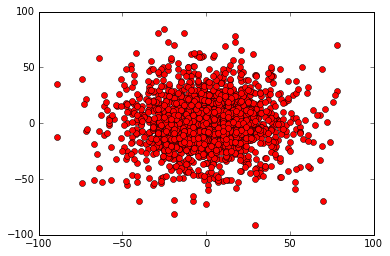

In [32]:
processDrunkers(UsualDrunk, 2000)

## ColdDrunk:

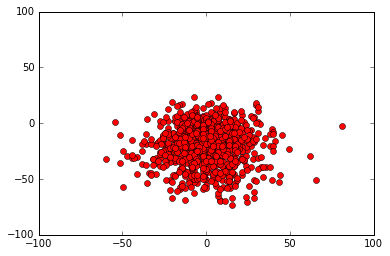

In [28]:
processDrunkers(ColdDrunk, 1000)

## EDrunk

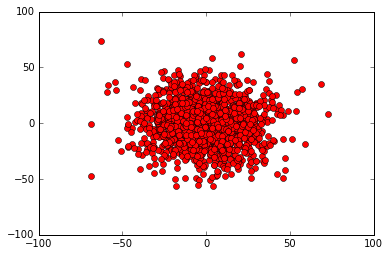

In [33]:
processDrunkers(EDrunk, 2000)

## PhotoDrunk:

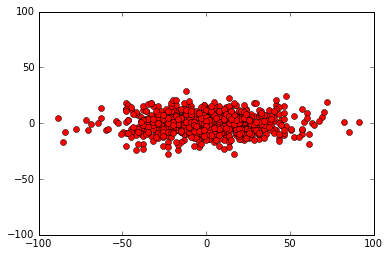

In [30]:
processDrunkers(PhotoDrunk, 1000)

## DDrunk:

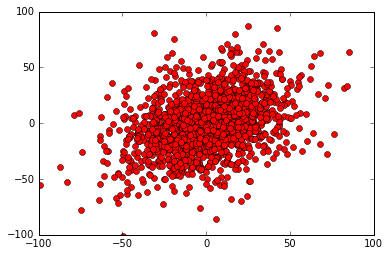

In [34]:
processDrunkers(DDrunk, 2000)